<a href="https://colab.research.google.com/github/TanmayBj23/BIS_LAB/blob/main/GSO_Image_Procesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Objective function (Sphere function: f(x) = sum(x_i^2))
def objective_function(x):
    return np.sum(x**2)

# Grey Wolf Optimizer (GWO) Algorithm
def grey_wolf_optimizer(objective_function, num_wolves, num_dimensions, max_iterations, lb, ub):
    # Initialize the wolves' positions randomly within the bounds (lb and ub)
    wolves = np.random.uniform(low=lb, high=ub, size=(num_wolves, num_dimensions))

    # Initialize alpha, beta, delta wolves' positions and fitness values
    alpha_position = np.zeros(num_dimensions)
    beta_position = np.zeros(num_dimensions)
    delta_position = np.zeros(num_dimensions)
    alpha_score = float('inf')
    beta_score = float('inf')
    delta_score = float('inf')

    # Main loop for the Grey Wolf Optimizer
    for iteration in range(max_iterations):
        # Evaluate the fitness of each wolf
        fitness = np.array([objective_function(wolf) for wolf in wolves])

        # Update alpha, beta, and delta positions based on fitness
        for i in range(num_wolves):
            if fitness[i] < alpha_score:  # New alpha wolf
                alpha_score = fitness[i]
                alpha_position = wolves[i]
            elif fitness[i] < beta_score:  # New beta wolf
                beta_score = fitness[i]
                beta_position = wolves[i]
            elif fitness[i] < delta_score:  # New delta wolf
                delta_score = fitness[i]
                delta_position = wolves[i]

        # Update the positions of the wolves
        a = 2 - iteration * (2 / max_iterations)  # Decrease linearly from 2 to 0
        r1 = np.random.rand(num_wolves, num_dimensions)  # Random vector for exploration
        r2 = np.random.rand(num_wolves, num_dimensions)  # Random vector for exploitation

        # Update each wolf's position using the Grey Wolf mathematical model
        for i in range(num_wolves):
            A = 2 * a * r1[i] - a  # Coefficients for exploration (apply to each wolf individually)
            C = 2 * r2[i]           # Coefficients for exploitation (apply to each wolf individually)

            # Calculate the distance between the current wolf and alpha, beta, delta wolves
            D_alpha = np.abs(C * alpha_position - wolves[i])
            D_beta = np.abs(C * beta_position - wolves[i])
            D_delta = np.abs(C * delta_position - wolves[i])

            # Update the wolf's position based on alpha, beta, and delta wolves
            wolf_new_position = alpha_position - A * D_alpha
            wolf_new_position = beta_position - A * D_beta
            wolf_new_position = delta_position - A * D_delta

            # Ensure the wolf stays within bounds (clip the values)
            wolves[i] = np.clip(wolf_new_position, lb, ub)

        # Print the progress of the algorithm
        print(f"Iteration {iteration + 1}/{max_iterations} - Best fitness: {alpha_score}")

    return alpha_position, alpha_score

# Example usage
if __name__ == "__main__":
    # Parameters
    num_wolves = 30        # Number of wolves in the population
    num_dimensions = 2     # Dimensionality of the problem (e.g., 2D for a 2-variable problem)
    max_iterations = 10   # Number of iterations
    lb = -10               # Lower bound of the search space
    ub = 10                # Upper bound of the search space

    # Call the Grey Wolf Optimizer function
    best_position, best_score = grey_wolf_optimizer(objective_function, num_wolves, num_dimensions, max_iterations, lb, ub)

    # Output the best result
    print("Best Position:", best_position)
    print("Best Fitness (Objective Value):", best_score)


Iteration 1/10 - Best fitness: 7.084138312476319
Iteration 2/10 - Best fitness: 2.569658509002483
Iteration 3/10 - Best fitness: 0.011421439900541168
Iteration 4/10 - Best fitness: 0.011421439900541168
Iteration 5/10 - Best fitness: 0.011421439900541168
Iteration 6/10 - Best fitness: 0.011421439900541168
Iteration 7/10 - Best fitness: 0.011421439900541168
Iteration 8/10 - Best fitness: 0.009710154989412256
Iteration 9/10 - Best fitness: 0.003847373595344483
Iteration 10/10 - Best fitness: 0.002553316297775915
Best Position: [-0.05533355 -0.06309547]
Best Fitness (Objective Value): 0.002553316297775915


Optimal Threshold: [50.72033811], Fitness Value: -8467828126371015.0


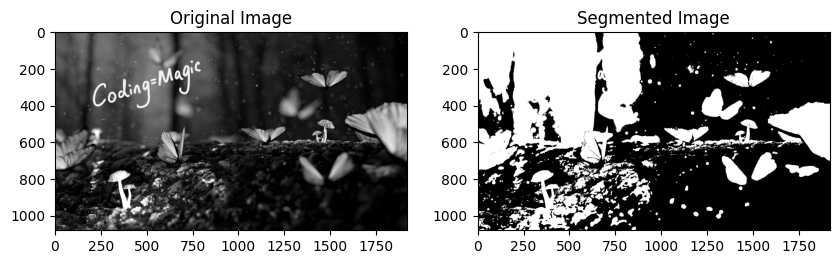

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

class GreyWolfOptimizer:
    def __init__(self, fitness_func, dim, lb, ub, population_size=30, max_iter=50):
        self.fitness_func = fitness_func
        self.dim = dim
        self.lb = lb
        self.ub = ub
        self.population_size = population_size
        self.max_iter = max_iter

    def optimize(self):
        # Initialize positions of wolves
        wolves = np.random.uniform(self.lb, self.ub, (self.population_size, self.dim))
        fitness = np.array([self.fitness_func(w) for w in wolves])

        # Identify alpha, beta, and delta
        alpha = wolves[np.argmin(fitness)]
        beta = wolves[np.argsort(fitness)[1]]
        delta = wolves[np.argsort(fitness)[2]]
        alpha_score, beta_score, delta_score = np.min(fitness), fitness[np.argsort(fitness)[1]], fitness[np.argsort(fitness)[2]]

        # Optimization loop
        for t in range(self.max_iter):
            a = 2 - t * (2 / self.max_iter)  # Decreasing linear component

            for i in range(self.population_size):
                for j in range(self.dim):
                    # Update wolves' positions
                    r1, r2 = np.random.rand(), np.random.rand()
                    A1, C1 = 2 * a * r1 - a, 2 * r2
                    D_alpha = abs(C1 * alpha[j] - wolves[i, j])
                    X1 = alpha[j] - A1 * D_alpha

                    r1, r2 = np.random.rand(), np.random.rand()
                    A2, C2 = 2 * a * r1 - a, 2 * r2
                    D_beta = abs(C2 * beta[j] - wolves[i, j])
                    X2 = beta[j] - A2 * D_beta

                    r1, r2 = np.random.rand(), np.random.rand()
                    A3, C3 = 2 * a * r1 - a, 2 * r2
                    D_delta = abs(C3 * delta[j] - wolves[i, j])
                    X3 = delta[j] - A3 * D_delta

                    # Calculate new position
                    wolves[i, j] = np.clip((X1 + X2 + X3) / 3, self.lb[j], self.ub[j])

            # Evaluate fitness
            fitness = np.array([self.fitness_func(w) for w in wolves])

            # Update alpha, beta, delta
            alpha = wolves[np.argmin(fitness)]
            beta = wolves[np.argsort(fitness)[1]]
            delta = wolves[np.argsort(fitness)[2]]
            alpha_score = np.min(fitness)

        return alpha, alpha_score


# Image Processing Application: Image Thresholding
def image_thresholding_fitness(thresholds, image):
    """Fitness function: Maximizing Otsu's between-class variance."""
    thresholds = thresholds.astype(int)
    thresholds = np.clip(thresholds, 0, 255)
    hist = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
    total = hist.sum()
    weight_b, mean_b, sum_b = 0, 0, 0
    max_var = 0

    for i in range(256):
        weight_b += hist[i]
        weight_f = total - weight_b
        if weight_b == 0 or weight_f == 0:
            continue

        sum_b += i * hist[i]
        mean_b = sum_b / weight_b
        mean_f = (hist[i:].dot(np.arange(i, 256))) / weight_f

        # Calculate between-class variance
        between_class_variance = weight_b * weight_f * (mean_b - mean_f) ** 2
        if between_class_variance > max_var:
            max_var = between_class_variance

    return -max_var  # Minimize negative of the variance


if __name__ == "__main__":
    # Load a grayscale image
    image = cv2.imread('sample_image.jpg', 0)  # Provide your grayscale image path here

    # Set parameters for GWO
    gwo = GreyWolfOptimizer(
        fitness_func=lambda x: image_thresholding_fitness(x, image),
        dim=1,
        lb=[0],
        ub=[255],
        population_size=30,
        max_iter=50,
    )

    # Run GWO to find the optimal threshold
    optimal_threshold, fitness_value = gwo.optimize()
    print(f"Optimal Threshold: {optimal_threshold}, Fitness Value: {fitness_value}")

    # Apply thresholding to the image
    _, segmented_image = cv2.threshold(image, int(optimal_threshold[0]), 255, cv2.THRESH_BINARY)

    # Display the original and segmented images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title("Segmented Image")
    plt.imshow(segmented_image, cmap='gray')
    plt.show()


